In [1]:
from astropy.visualization import quantity_support, time_support
import numpy as np
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy.visualization import simple_norm, ImageNormalize, LogStretch, PercentileInterval
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [2]:
times = np.arange(100)*u.s
arr1 = np.arange(100)*u.m
arr2 = 0.5*np.arange(100)*u.cm

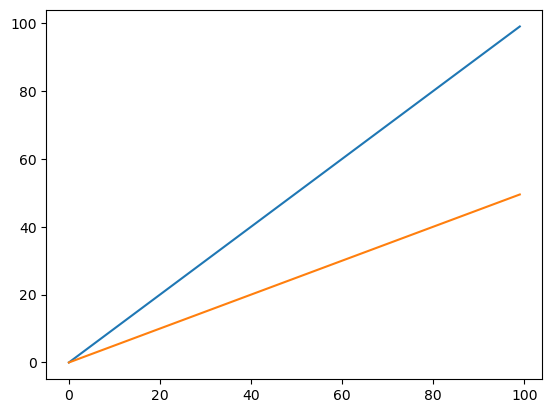

In [4]:
plt.plot(times,arr1)
plt.plot(times,arr2)
plt.show()

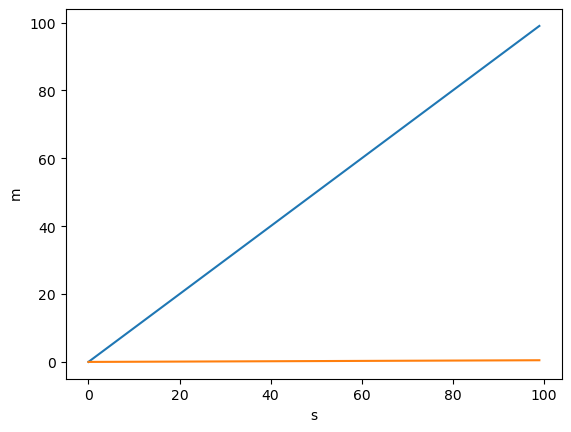

In [6]:
with quantity_support():
    plt.plot(times, arr1)
    plt.plot(times, arr2)
    plt.show()

In [13]:
t1 = Time(58000,format='mjd')
t1.to_value('ymdhms')

(2017, 9, 4, 0, 0, 0.)

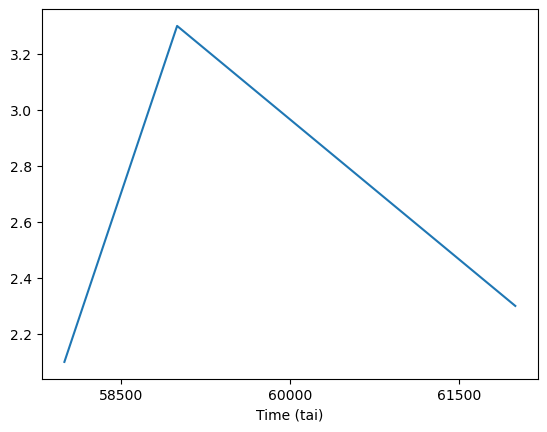

In [16]:
with time_support():
    plt.plot(Time([58000,59000,62000],format='mjd',scale='tai'),[2.1,3.3,2.3])
    plt.show()

In [2]:
file = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

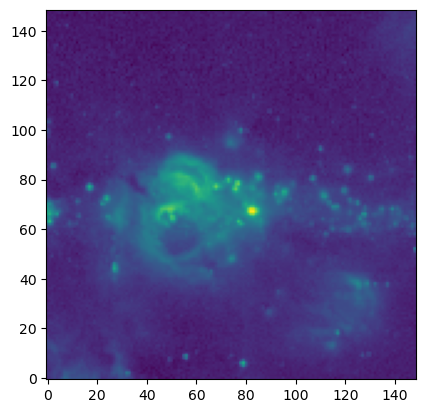

In [9]:
hdu = fits.open(file)[0]
data = hdu.data

norm_log = ImageNormalize(data, stretch=LogStretch())
plt.imshow(data,origin='lower',norm=norm_log)
plt.show()

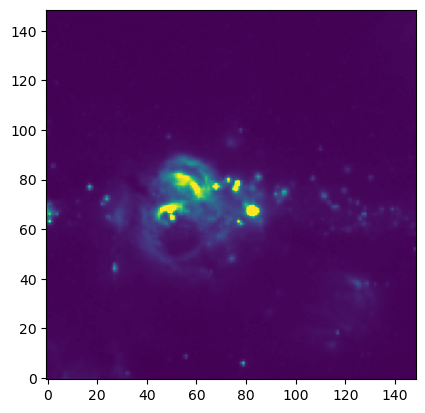

In [11]:
interval = PercentileInterval(99.5)
vmin, vmax = interval.get_limits(data)

plt.imshow(data,origin='lower',vmin=vmin, vmax=vmax)
plt.show()

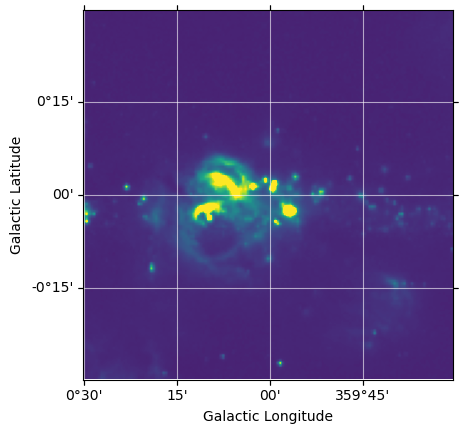

In [3]:
hdu = fits.open(file)[0]
wcs = WCS(hdu.header)

fig, ax = plt.subplots(subplot_kw=dict(projection=wcs))
ax.imshow(hdu.data, vmin=-2e-5, vmax=2e-4, origin='lower')
ax.grid(color='white', alpha=0.6)
ax.set(xlabel='Galactic Longitude', ylabel='Galactic Latitude')
plt.show()

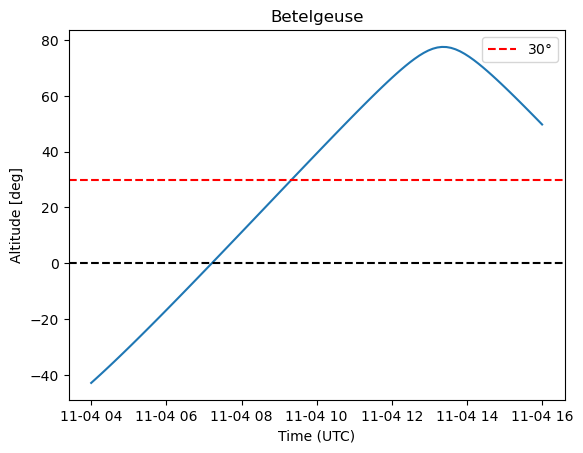

In [2]:
target = SkyCoord('05h55m10.3s +07d24m25s',frame='icrs')
location = EarthLocation(lon=-155.47833333*u.deg, 
                         lat=19.82833333*u.deg, 
                         height=4160*u.m) 
# alternatively
# location = EarthLocation.of_site('Keck Observatory')
times = Time('2025-11-04 00:00') + 10*u.hour + np.linspace(-6, 6, 100)*u.hour
altaz_frame = AltAz(obstime=times, location=location)
altaz = target.transform_to(altaz_frame)

plt.figure()
plt.plot(times.datetime, altaz.alt)
plt.title('Betelgeuse')
plt.xlabel('Time (UTC)')
plt.ylabel('Altitude [deg]')
plt.axhline(0, color='k', ls='--')
plt.axhline(30, color='r', ls='--', label=r'30$\degree$')
plt.legend()
plt.show()